In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.style.use('seaborn-whitegrid')

<ErrorbarContainer object of 3 artists>

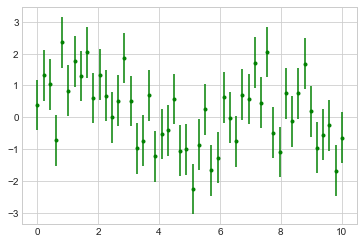

In [7]:
plt.errorbar(x,y,yerr=dy,fmt='.g')

<ErrorbarContainer object of 3 artists>

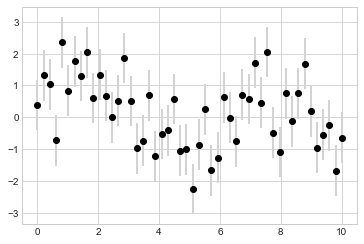

In [9]:
"""
让误差线的颜色比数据点的颜色浅一点效果会非常好，尤其是在那些比较密集的图形中
"""
plt.errorbar(x,y,yerr=dy,fmt='ok',ecolor='lightgray',elinewidth=3,capsize=0)

In [11]:
from sklearn.gaussian_process import GaussianProcess
model = lambda x: x * np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

In [12]:
gp = GaussianProcess(corr='cubic',theta0=1e-2,thetaL=1e-4,thetaU=1e-1,random_start=100)
gp.fit(xdata[:, np.newaxis],ydata)

xfit = np.linspace(0,10,1000)
yfit, MSE = gp.predict(xfit[:,np.newaxis],eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

(0, 10)

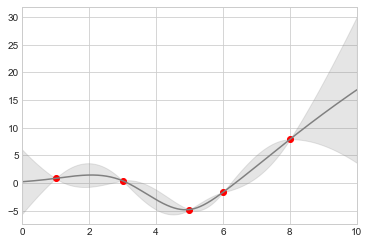

In [18]:
plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')
plt.fill_between(xfit,yfit - dyfit,yfit + dyfit,color="gray",alpha=0.2)
plt.xlim(0,10)
